IMPORT LIBRARY

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Visualization setup
sns.set(style='whitegrid')
%matplotlib inline


LOAD DATASET

In [2]:
file_path = r'C:\Qin\Dummy Project\Toyota-Stock-Data\TOYOTA Stock Data 2025.csv'

try:
    df = pd.read_csv(file_path)
    print('Data shape:', df.shape)
    display(df.head())
except Exception as e:
    print('Error reading file:', e)

Data shape: (11414, 7)


,date,open,high,low,close,adj_close,volume
0,NaN,TM,TM,TM,TM,TM,TM
1,1980-03-17,0.0,3.344743013381958,3.291227102279663,3.291227102279663,1.8489787578582764,41109
2,1980-03-18,0.0,3.3581221103668213,3.3046059608459473,3.3046059608459473,1.8564950227737427,9343
3,1980-03-19,3.3046059608459473,3.3046059608459473,3.3046059608459473,3.3046059608459473,1.8564950227737427,0
4,1980-03-20,0.0,3.3581221103668213,3.3046059608459473,3.3046059608459473,1.8564950227737427,10277


PREPOCESSING

In [3]:
# Convert 'date' ke datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Pastikan kolom numerik terkonversi dengan benar
numeric_cols = ['open', 'high', 'low', 'close', 'adj_close', 'volume']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Hapus data kosong
df.dropna(inplace=True)
print('Cleaned data shape:', df.shape)

Cleaned data shape: (11413, 7)


LINEAR REGRESSION MODELLING

In [4]:
# Define features and target
features = ['open', 'high', 'low', 'adj_close']
target = 'close'

# Split the data into training and testing sets (80% train, 20% test)
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 0.17
R² Score: 0.9999


VISUALIZATION

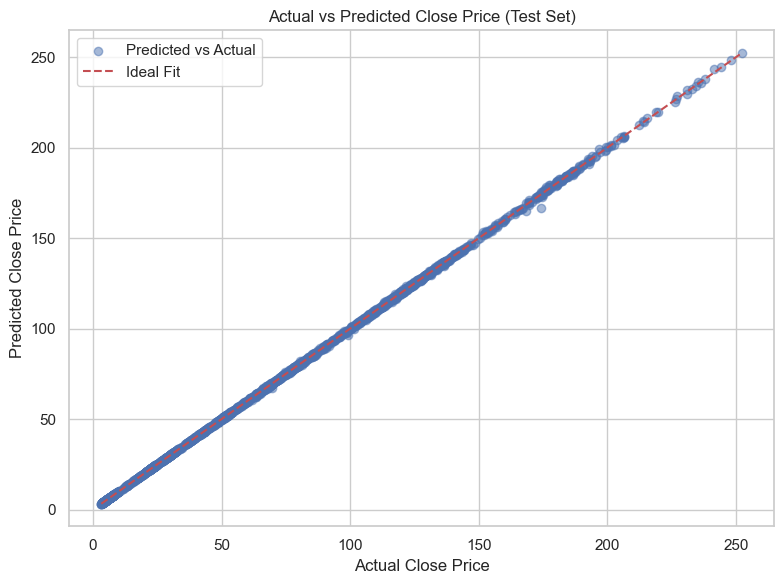

In [5]:
# Scatter plot: Actual vs Predicted Close Price
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Price (Test Set)')
plt.legend()
plt.tight_layout()
plt.show()